In [4]:
import os
import numpy as np
import scipy
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression

In [5]:
print('Current Directory: '+os.getcwd())

CSV_path = 'E:\SPACEFLIGHT TU DELFT\THESIS\LUNAR ZEBRO\Assembly, Integration and Testing\FGDOS Radiation Testing\Test Data\Data Logging & Processing\HollandPTC-12_04'
CSV_corrected_path = CSV_path + '\corrected'
print(CSV_corrected_path)

Current Directory: C:\Users\abhim\Documents\Jupyter Notebooks\FGDOS Radiation Testing\HollandPTC-12_04
E:\SPACEFLIGHT TU DELFT\THESIS\LUNAR ZEBRO\Assembly, Integration and Testing\FGDOS Radiation Testing\Test Data\Data Logging & Processing\HollandPTC-12_04\corrected


In [6]:
file_s1 ='FGDOS_03F_HIGH_C3_4_FULL_Apr_12_22-31-09_s1.csv'
file_s2 ='FGDOS_03F_HIGH_C3_4_FULL_Apr_12_22-31-09_s2.csv'
print(file_s1)
print(file_s2)
df_s1 = pd.read_csv('E:\SPACEFLIGHT TU DELFT\THESIS\LUNAR ZEBRO\Assembly, Integration and Testing\FGDOS Radiation Testing\Test Data\Data Logging & Processing\HollandPTC-12_04\Arduino_CSV\corrected'+ '\\'+ file_s1 ,encoding='ISO-8859-1')
df_s2 = pd.read_csv('E:\SPACEFLIGHT TU DELFT\THESIS\LUNAR ZEBRO\Assembly, Integration and Testing\FGDOS Radiation Testing\Test Data\Data Logging & Processing\HollandPTC-12_04\Arduino_CSV\corrected'+ '\\'+ file_s2 ,encoding='ISO-8859-1')


FGDOS_03F_HIGH_C3_4_FULL_Apr_12_22-31-09_s1.csv
FGDOS_03F_HIGH_C3_4_FULL_Apr_12_22-31-09_s2.csv


In [8]:
s1 = df_s1.to_numpy()
s2 = df_s2.to_numpy()
df_s1.head()
#df_s2.head()

,Time (ms),Sensor,Temperature (° C),Sensor Frequency (Hz),Reference Frequency (Hz),Recharge Register,Window Factor,Sensitivity,Passive,Standby
0,0.0000,1,89,79689,71289,0,7.63,h,0,0
1,245.2915,1,89,79635,71281,0,7.63,h,0,0
2,506.7296,1,89,79620,71258,0,7.63,h,0,0
3,769.0308,1,89,79643,71258,0,7.63,h,0,0
4,1031.4628,1,89,79658,71266,0,7.63,h,0,0


In [10]:
df_s1.tail()
#df_s2.tail()

,Time (ms),Sensor,Temperature (° C),Sensor Frequency (Hz),Reference Frequency (Hz),Recharge Register,Window Factor,Sensitivity,Passive,Standby
1540,424721.3665,1,90,233032,70915,1,7.63,h,0,0
1541,424983.6796,1,90,233039,70915,1,7.63,h,0,0
1542,425245.3504,1,90,233024,70907,1,7.63,h,0,0
1543,425507.7669,1,90,233047,70907,1,7.63,h,0,0
1544,425773.5831,1,90,233078,70907,1,7.63,h,0,0


In [11]:
# Test and to see rebound at 200 MeV
energy = 200
dose_rate_air = 0.6  # Gy/min
conv_factor = 0.912   # LET protons in Si / Air @ energy
dose_rate_Si = dose_rate_air * conv_factor

In [12]:
s1[s1[:,3]<90000]

array([[0.0, 1, 89, ..., 'h', 0, 0],
       [245.2915, 1, 89, ..., 'h', 0, 0],
       [506.7296, 1, 89, ..., 'h', 0, 0],
       ...,
       [220579.8692, 1, 90, ..., 'h', 0, 0],
       [220858.594, 1, 90, ..., 'h', 0, 0],
       [221137.9435, 1, 90, ..., 'h', 0, 0]], dtype=object)

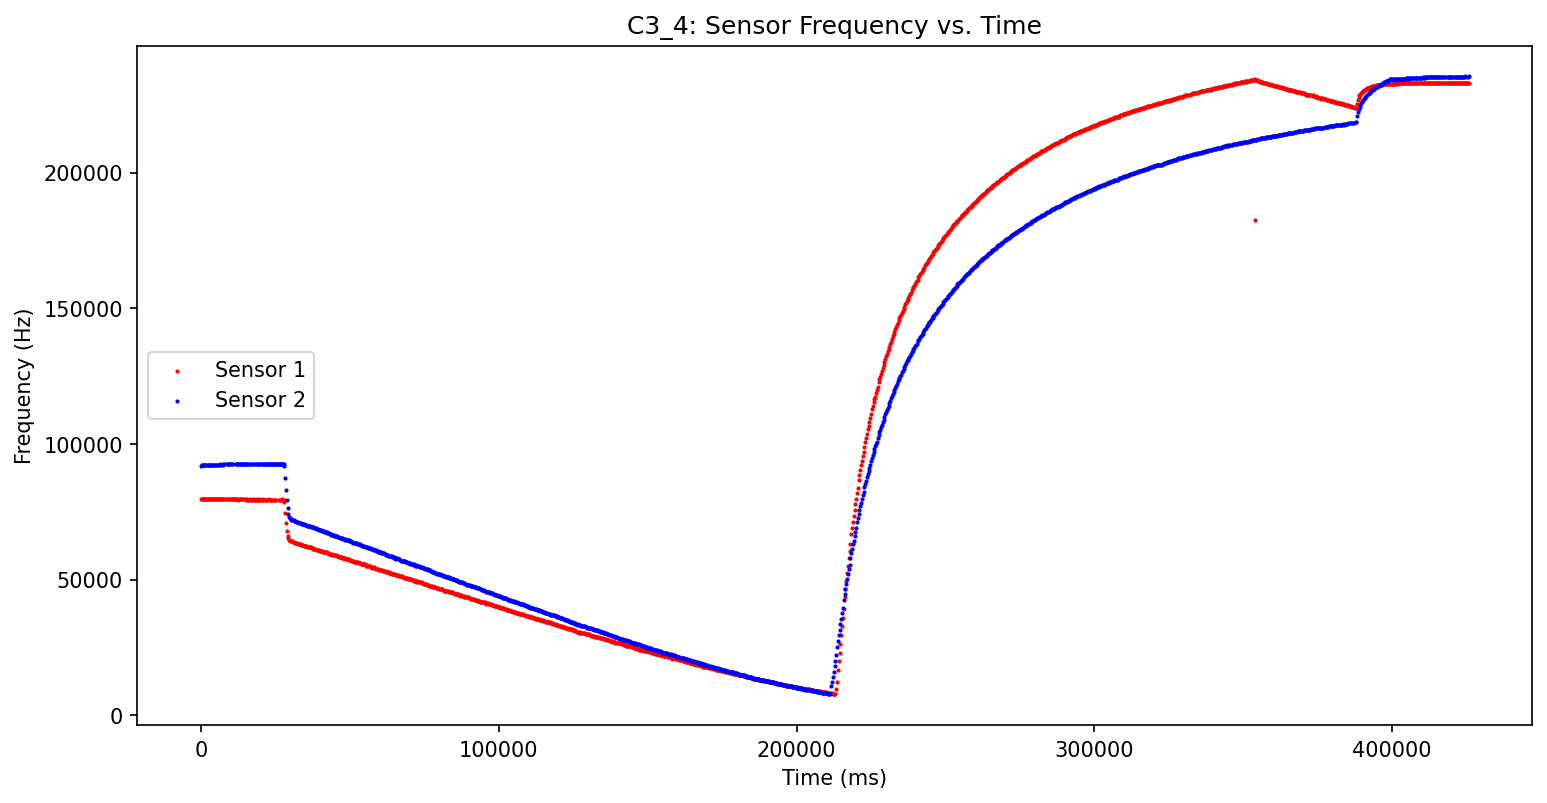

In [18]:
fig_sen_freq = plt.figure(figsize=(12, 6), dpi=150)
plt.scatter(s1[:,0], s1[:,3],s=1, c='r',label = 'Sensor 1')
plt.scatter(s2[:,0], s2[:,3],s=1, c='b', label = 'Sensor 2')

plt.xlabel('Time (ms)')
plt.ylabel('Frequency (Hz)')
#plt.xlim(0.1e5,2.2e5)
#plt.xlim(ll_2,ul_2)
#plt.ylim(0.3e5,1.2e5)
plt.legend(loc="center left")
plt.title("C3_4: Sensor Frequency vs. Time")
plt.show()

In [19]:
# Sensor 1 irradiation intervals
#s1[(s1[:,0]> 6.2e4) & (s1[:,0]< 9e4)]
ll_1 = 0.4e5
ul_1 = 2.1e5
zone_1 = s1[(s1[:,0]> ll_1) & (s1[:,0]< ul_1)]

In [28]:
# Sensitivity Sensor 1 - Overall
model_s1 = LinearRegression()
t = s1[1:,0].reshape(-1, 1)
s_freq = s1[1:,3].reshape(-1, 1)
model_s1.fit(t,s_freq)
r_sq = model_s1.score(t,s_freq)
print('coefficient of determination:', r_sq)
print('intercept:', model_s1.intercept_)
print('slope:', model_s1.coef_)
sensitivity_s1 = abs(model_s1.coef_)/(dose_rate_Si/60)

print('Sensor 1 sensitivity in kHz/Gy: ',sensitivity_s1)

coefficient of determination: 0.25402154214510564
intercept: [58609.64746694]
slope: [[0.06159072]]
Sensor 1 sensitivity in kHz/Gy:  [[6.79809292]]


In [20]:
# Sensitivity Sensor 1 - Zone 1
model_s1 = LinearRegression()
t = zone_1[:,0].reshape(-1, 1)
s_freq = zone_1[:,3].reshape(-1, 1)
model_s1.fit(t,s_freq)
r_sq = model_s1.score(t,s_freq)
print('coefficient of determination:', r_sq)
print('intercept:', model_s1.intercept_)
print('slope:', model_s1.coef_)
sensitivity_s1 = abs(model_s1.coef_)/(dose_rate_Si/60)

print('Sensor 1 sensitivity in kHz/Gy: ',sensitivity_s1)

coefficient of determination: 0.9963474400419132
intercept: [71915.3512944]
slope: [[-0.31606918]]
Sensor 1 sensitivity in kHz/Gy:  [[34.65670828]]


In [21]:
# Sensor 2 irradiation intervals
ll_1 = 0.4e5
ul_1 = 2.1e5
zone_1 = s2[(s2[:,0]> ll_1) & (s2[:,0]< ul_1)]

In [32]:
# Sensitivity Sensor 2 - Overall
model_s2 = LinearRegression()
t = s2[1:,0].reshape(-1, 1)
s_freq = s2[1:,3].reshape(-1, 1)
model_s2.fit(t,s_freq)
r_sq = model_s2.score(t,s_freq)
print('coefficient of determination:', r_sq)
print('intercept:', model_s2.intercept_)
print('slope:', model_s2.coef_)
sensitivity_s2 = abs(model_s2.coef_)/(dose_rate_Si/60)

print('Sensor 2 sensitivity in kHz/Gy: ',sensitivity_s2)

coefficient of determination: 0.1716664237654132
intercept: [56983.50189746]
slope: [[0.07146074]]
Sensor 2 sensitivity in kHz/Gy:  [[7.88749841]]


In [22]:
# Sensitivity Sensor 2 - Zone 1
model_s2 = LinearRegression()
t = zone_1[:,0].reshape(-1, 1)
s_freq = zone_1[:,3].reshape(-1, 1)
model_s2.fit(t,s_freq)
r_sq = model_s2.score(t,s_freq)
print('coefficient of determination:', r_sq)
print('intercept:', model_s2.intercept_)
print('slope:', model_s2.coef_)
sensitivity_s2 = abs(model_s2.coef_)/(dose_rate_Si/60)

print('Sensor 2 sensitivity in kHz/Gy: ',sensitivity_s2)

coefficient of determination: 0.995515533211561
intercept: [81100.62238914]
slope: [[-0.36541554]]
Sensor 2 sensitivity in kHz/Gy:  [[40.06749368]]


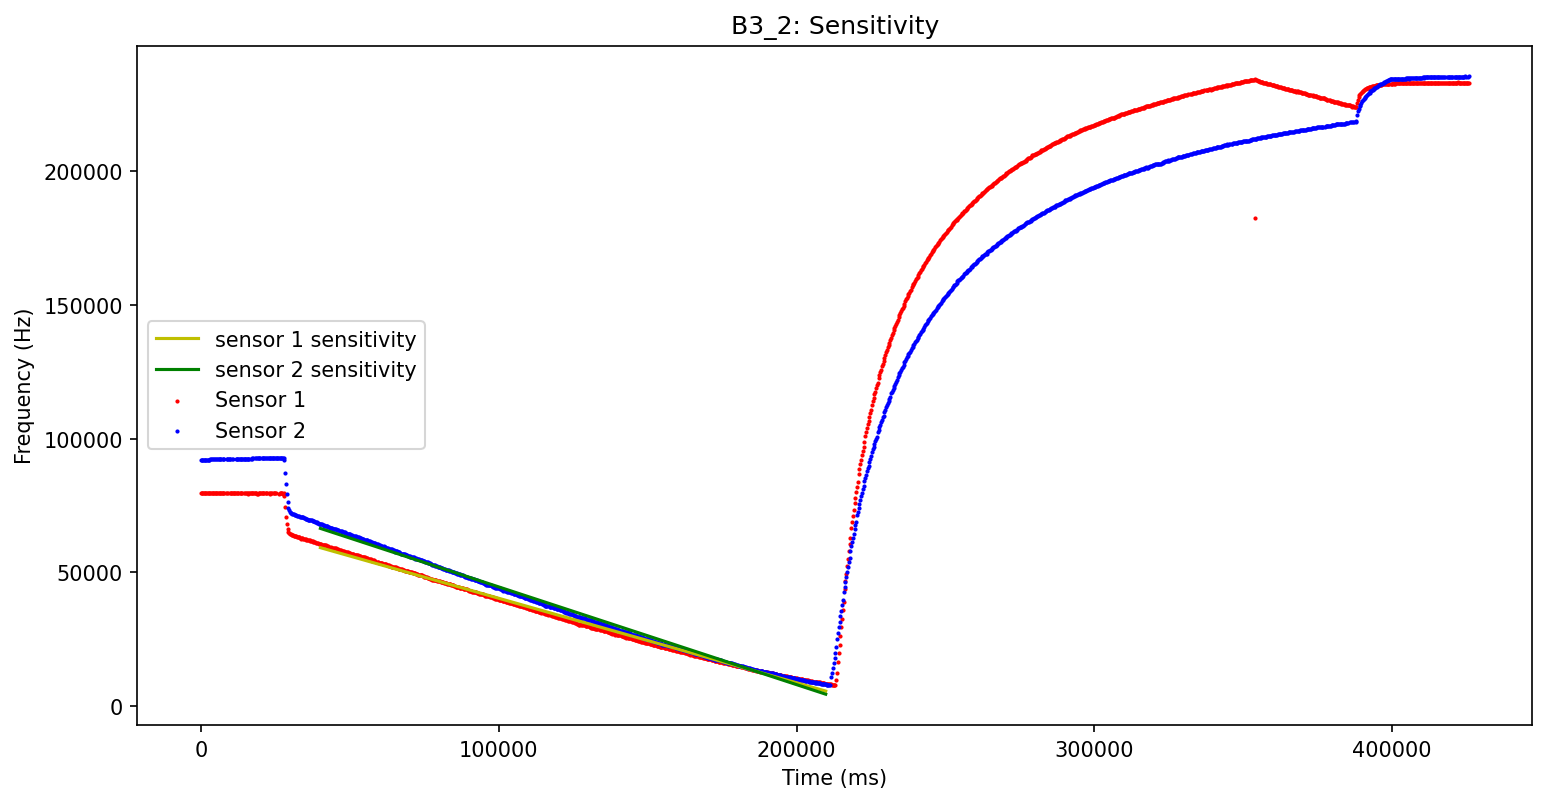

In [24]:
# Plot the linear regression lines
intercept_s1 = model_s1.intercept_
slope_s1 = model_s1.coef_
sensi_s1 = intercept_s1 + t*slope_s1

intercept_s2 = model_s2.intercept_
slope_s2 = model_s2.coef_
sensi_s2 = intercept_s2 + t*slope_s2

fig_sensitivity_freq = plt.figure(figsize=(12, 6), dpi=150)
plt.scatter(s1[:,0], s1[:,3],s=1, c='r',label = 'Sensor 1')
plt.scatter(s2[:,0], s2[:,3],s=1, c='b', label = 'Sensor 2')
plt.plot(t,sensi_s1,'y-',label='sensor 1 sensitivity')
plt.plot(t,sensi_s2,'g-',label='sensor 2 sensitivity')
#plt.ylim(0.3e5,1.2e5)

plt.xlabel('Time (ms)')
plt.ylabel('Frequency (Hz)')
plt.legend(loc="center left")
plt.title("C3_4: Sensitivity")
plt.show()

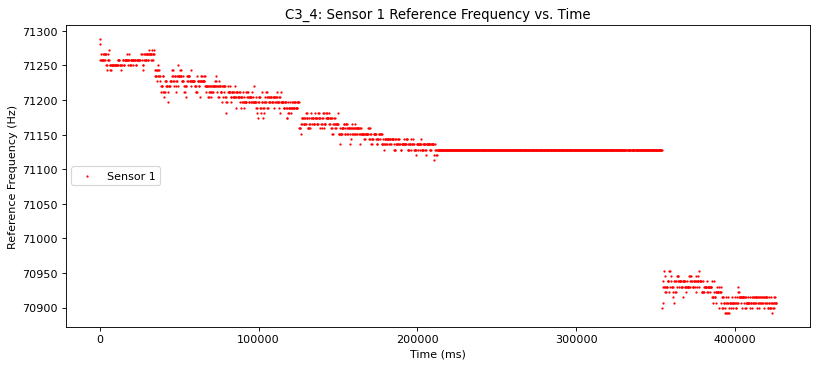

min:  70892
max:  71289
range:  397
mean:  71125.3074433657
standard deviation:  102.55518354891542


In [26]:
fig_ref_freq_s1 = plt.figure(figsize=(12, 5), dpi=80)
plt.scatter(s1[:,0], s1[:,4],s=1, c='r', label = 'Sensor 1')

plt.xlabel('Time (ms)')
plt.ylabel('Reference Frequency (Hz)')
plt.legend(loc="center left")
plt.title("C3_4: Sensor 1 Reference Frequency vs. Time")
plt.show()
print('min: ',s1[:,4].min())
print('max: ',s1[:,4].max())
print('range: ',s1[:,4].max()-s1[:,4].min())
print('mean: ',s1[:,4].mean())
print('standard deviation: ',s1[:,4].std())

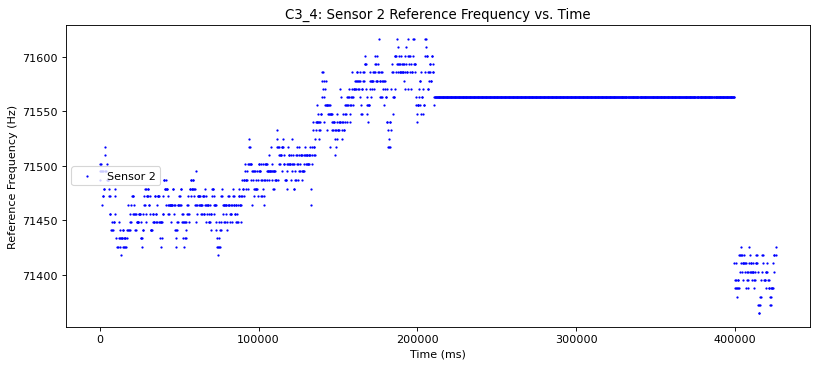

min:  71365
max:  71617
range:  252
mean:  71524.71818181819
sigma:  55.74948424960402


In [27]:
fig_ref_freq_s2 = plt.figure(figsize=(12, 5), dpi=80)
plt.scatter(s2[:,0], s2[:,4],s=1, c='b', label = 'Sensor 2')

plt.xlabel('Time (ms)')
plt.ylabel('Reference Frequency (Hz)')
plt.legend(loc="center left")
plt.title("C3_4: Sensor 2 Reference Frequency vs. Time")
plt.show()

print('min: ',s2[:,4].min())
print('max: ',s2[:,4].max())
print('range: ',s2[:,4].max()-s2[:,4].min())
print('mean: ',s2[:,4].mean())
print('sigma: ',s2[:,4].std())

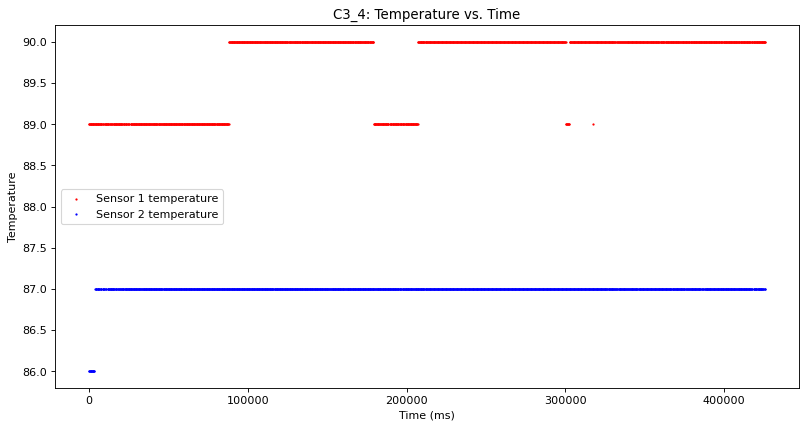

In [28]:
fig_temp = plt.figure(figsize=(12, 6), dpi=80)
plt.scatter(s1[:,0], s1[:,2],s=1,c='r',label = 'Sensor 1 temperature')
plt.scatter(s2[:,0], s2[:,2],s=1,c='b',label = 'Sensor 2 temperature')

plt.xlabel('Time (ms)')
plt.ylabel('Temperature')
plt.legend(loc="center left")
plt.title("C3_4: Temperature vs. Time")
plt.show()

[72306 72306 72306 ... 71828 71828 71829]


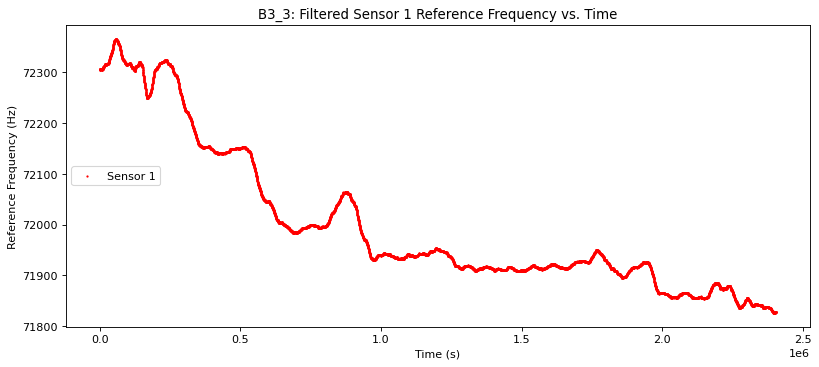

min:  71826
max:  72366
range:  540
mean:  72003.21778805208
sigma:  147.09387933990004


In [21]:
# Filtering of sensor & Reference frequencies
#Moving average filter with N point average

from scipy.ndimage.filters import uniform_filter1d

# Number of points used for averaging
N=100
y = uniform_filter1d(s1[:,4].astype(int), size=N)
print(y)

fig_ref_freq_s1 = plt.figure(figsize=(12, 5), dpi=80)
plt.scatter(s1[:,0], y,s=1, c='r', label = 'Sensor 1')

plt.xlabel('Time (s)')
plt.ylabel('Reference Frequency (Hz)')
plt.legend(loc="center left")
plt.title("B3_3: Filtered Sensor 1 Reference Frequency vs. Time")
plt.show()
print('min: ',y.min())
print('max: ',y.max())
print('range: ',y.max()-y.min())
print('mean: ',y.mean())
print('sigma: ',y.std())